# Ford B Model Evaluation

In [1]:
import pandas as pd

In [2]:
df_feature = pd.read_csv('C:/Users/user/Desktop/AI & ML/Project/FordBX_train.csv',index_col='file_name')
df_featuret = pd.read_csv('C:/Users/user/Desktop/AI & ML/Project/FordBX_test.csv',index_col='file_name')

In [3]:
accuracy_list = []
sensitivity_score = []
specificity_score = []

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

df_feature = shuffle(df_feature)

X_train = df_feature.drop(['label'],axis=1)
y_train = df_feature['label']
X_test = df_featuret.drop(['label'],axis=1)
y_test = df_featuret['label']

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
scaler.fit(X_test)
X_test = scaler.transform(X_test)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


In [5]:
RFC_METRIC = 'entropy'  #metric used for RandomForrestClassifier
NUM_ESTIMATORS = 100 #number of estimators used for RandomForrestClassifier
NO_JOBS = -1 #number of parallel jobs used for RandomForrestClassifier
clf = RandomForestClassifier(n_jobs=NO_JOBS, 
                             random_state=2000,
                             criterion=RFC_METRIC,
                             n_estimators=NUM_ESTIMATORS,
                             verbose=False)

scores_RF = cross_val_score(clf, X_train, y_train, cv=5)
scores_RF


array([0.92994505, 0.92984869, 0.92572215, 0.92709766, 0.94497937])

In [6]:
clf.fit(X_train,y_train)
pred1 = clf.predict(X_test)
acc_score_RF = accuracy_score(y_test,pred1)
acc_score_RF

0.725925925925926

In [7]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred1)
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

Sensitivity_RF = TP / (TP + FN)
Specificity_RF = TN / (TN + FP)

print(F"Sensitivity is { Sensitivity_RF }")
print(F"Specificity is { Specificity_RF }")

Sensitivity is 0.727735368956743
Specificity is 0.7242206235011991


In [8]:
accuracy_list.append(acc_score_RF)
sensitivity_score.append(Sensitivity_RF)
specificity_score.append(Specificity_RF)

In [9]:
from sklearn import svm
clf_svm1 = svm.SVC(kernel='linear', C=1)
scores_svm1 = cross_val_score(clf_svm1, X_train, y_train, cv=5)
scores_svm1

array([0.93406593, 0.93672627, 0.91746905, 0.94085282, 0.9215956 ])

In [10]:
clf_svm1.fit(X_train,y_train)
pred2 = clf_svm1.predict(X_test)
acc_score_svm1 = accuracy_score(y_test,pred2)
acc_score_svm1

0.7283950617283951

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred2)
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

Sensitivity_svm1 = TP / (TP + FN)
Specificity_svm1 = TN / (TN + FP)

print(F"Sensitivity is { Sensitivity_svm1 }")
print(F"Specificity is { Specificity_svm1 }")

Sensitivity is 0.7061503416856492
Specificity is 0.7547169811320755


In [12]:
accuracy_list.append(acc_score_svm1)
sensitivity_score.append(Sensitivity_svm1)
specificity_score.append(Specificity_svm1)

In [13]:
clf_svm2 = svm.SVC(kernel='rbf', C=1)
scores_svm2 = cross_val_score(clf_svm2, X_train, y_train, cv=5)
scores_svm2

C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: 

array([0.91208791, 0.92572215, 0.90371389, 0.91884457, 0.92984869])

In [14]:
clf_svm2.fit(X_train,y_train)
pred2 = clf_svm2.predict(X_test)
acc_score_svm2 = accuracy_score(y_test,pred2)
acc_score_svm2

0.7185185185185186

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred2)
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

Sensitivity_svm2 = TP / (TP + FN)
Specificity_svm2 = TN / (TN + FP)

print(F"Sensitivity is { Sensitivity_svm2 }")
print(F"Specificity is { Specificity_svm2 }")

Sensitivity is 0.7104622871046229
Specificity is 0.7268170426065163


In [16]:
accuracy_list.append(acc_score_svm2)
sensitivity_score.append(Sensitivity_svm2)
specificity_score.append(Specificity_svm2)

In [17]:
clf_svm3 = svm.SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
scores_svm3 = cross_val_score(clf_svm3, X_train, y_train, cv=5)
scores_svm3

array([0.92857143, 0.93122421, 0.92297111, 0.94222834, 0.93397524])

In [18]:
clf_svm3.fit(X_train,y_train)
pred3 = clf_svm3.predict(X_test)
acc_score_svm3 = accuracy_score(y_test,pred3)
acc_score_svm3

0.7506172839506173

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred3)
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

Sensitivity_svm3 = TP / (TP + FN)
Specificity_svm3 = TN / (TN + FP)

print(F"Sensitivity is { Sensitivity_svm3 }")
print(F"Specificity is { Specificity_svm3 }")

Sensitivity is 0.7104622871046229
Specificity is 0.7268170426065163


In [20]:
accuracy_list.append(acc_score_svm3)
sensitivity_score.append(Sensitivity_svm3)
specificity_score.append(Specificity_svm3)

In [21]:
from sklearn.ensemble import VotingClassifier

estimators = []
estimators.append(('rf', clf))
estimators.append(('svm', clf_svm1))
estimators.append(('svm3', clf_svm3))
# create the ensemble model
ensemble = VotingClassifier(estimators)

In [22]:
scores_ens = cross_val_score(ensemble, X_train, y_train, cv=5)
scores_ens

array([0.93406593, 0.93672627, 0.92022008, 0.94085282, 0.93535076])

In [23]:
ensemble.fit(X_train,y_train)
pred4 = ensemble.predict(X_test)
acc_score_ens = accuracy_score(y_test,pred4)
acc_score_ens

0.7432098765432099

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred3)
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

Sensitivity_ens = TP / (TP + FN)
Specificity_ens = TN / (TN + FP)

print(F"Sensitivity is { Sensitivity_ens }")
print(F"Specificity is { Specificity_ens }")

Sensitivity is 0.7256235827664399
Specificity is 0.7804878048780488


In [25]:
accuracy_list.append(acc_score_ens)
sensitivity_score.append(Sensitivity_ens)
specificity_score.append(Specificity_ens)

Text(0.5, 1.0, 'KFold trend of different Models')

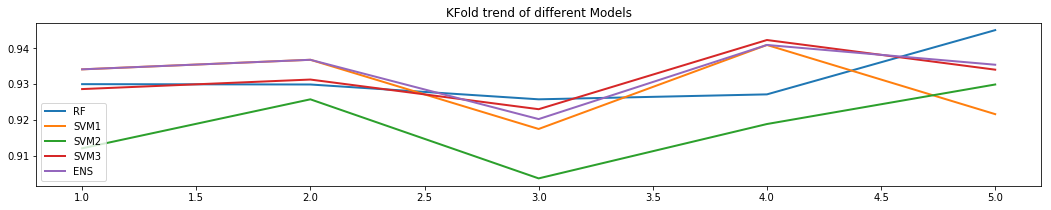

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

fig= plt.figure(figsize=(18,3))
plt.plot( [1,2,3,4,5], scores_RF, linewidth=2,label="RF")
plt.plot( [1,2,3,4,5], scores_svm1, linewidth=2,label="SVM1")
plt.plot( [1,2,3,4,5], scores_svm2, linewidth=2,label="SVM2")
plt.plot( [1,2,3,4,5], scores_svm3, linewidth=2,label="SVM3")
plt.plot( [1,2,3,4,5], scores_ens, linewidth=2,label="ENS")
plt.legend()
plt.title("KFold trend of different Models")



Text(0.5, 1.0, 'Bar plot of accuracy')

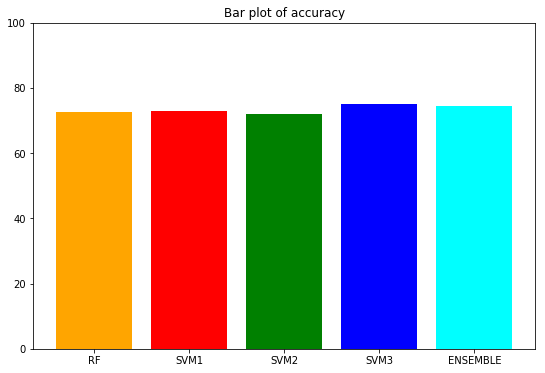

In [27]:
import numpy as np
accuracy_listnp = np.array(accuracy_list)
accuracy_listnp = accuracy_listnp * 100

fig= plt.figure(figsize=(9,6))
plt.ylim( (0, 100) ) 
plt.bar([1,2,3,4,5],accuracy_listnp,color=['orange', 'red', 'green', 'blue', 'cyan'])
plt.xticks([1,2,3,4,5], ('RF', 'SVM1', 'SVM2', 'SVM3', 'ENSEMBLE'))
plt.title("Bar plot of accuracy")

<Figure size 864x432 with 0 Axes>

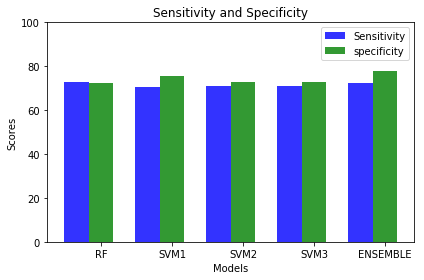

In [28]:
fig= plt.figure(figsize=(12,6))

# data to plot
n_groups = 5
sensitivity_scorenp = np.array(sensitivity_score)
sensitivity_scorenp = sensitivity_scorenp * 100
specificity_scorenp = np.array(specificity_score)
specificity_scorenp = specificity_scorenp * 100

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, sensitivity_scorenp, bar_width,
alpha=opacity,
color='b',
label='Sensitivity')

rects2 = plt.bar(index + bar_width, specificity_scorenp, bar_width,
alpha=opacity,
color='g',
label='specificity')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Sensitivity and Specificity')
plt.xticks(index + bar_width, ('RF', 'SVM1', 'SVM2', 'SVM3', 'ENSEMBLE'))
plt.ylim(0,100)
plt.legend()

plt.tight_layout()
plt.show()

# MRMR

In [29]:
mrmr_feature = [['mcr_cd1', 'zcr_ca4', 'ac499', 'mcr_ca4', 'mcr_fft', 'mean_psd', 'var_ca3', 'kurt_psd', 'ac498', 'skew_fftw', 'ac483', 'CF_fft', 'ac478', 'ac473', 'ac1', 'ac461', 'ac306', 'ac2', 'rms_ca3', 'zcr_ca3', 'CF_ca3', 'mcr_ca3', 'mean_ca4', 'std_ca4', 'CF_ca2', 'rms_ca2', 'std_ca2', 'skew_ca2', 'kurt_ca2', 'mode_ca2', 'mode_ca3', 'kurt_ca3', 'zcr_ca2', 'mean_ca3', 'std_ca3', 'skew_ca3', 'var_ca4', 'mean_ca2', 'ac489', 'ac491', 'ac486', 'ac488', 'ac479', 'ac490', 'ac465', 'ac496', 'ac497', 'ac481', 'skew_ca4', 'ac467'],['mcr_cd1', 'zcr_ca4', 'ac499', 'mcr_ca4', 'mcr_fft', 'mean_psd', 'var_ca3', 'kurt_psd', 'ac498', 'skew_fftw', 'ac483', 'CF_fft', 'ac478', 'ac473', 'ac1', 'ac461', 'ac306', 'ac2', 'rms_ca3', 'zcr_ca3', 'CF_ca3', 'mcr_ca3', 'mean_ca4', 'std_ca4', 'CF_ca2', 'rms_ca2', 'std_ca2', 'skew_ca2', 'kurt_ca2', 'mode_ca2', 'mode_ca3', 'kurt_ca3', 'zcr_ca2', 'mean_ca3', 'std_ca3', 'skew_ca3', 'var_ca4', 'mean_ca2', 'ac489', 'ac491'],['mcr_cd1', 'zcr_ca4', 'ac499', 'mcr_ca4', 'mcr_fft', 'mean_psd', 'var_ca3', 'kurt_psd', 'ac498', 'skew_fftw', 'ac483', 'CF_fft', 'ac478', 'ac473', 'ac1', 'ac461', 'ac306', 'ac2', 'rms_ca3', 'zcr_ca3', 'CF_ca3', 'mcr_ca3', 'mean_ca4', 'std_ca4', 'CF_ca2', 'rms_ca2', 'std_ca2', 'skew_ca2', 'kurt_ca2', 'mode_ca2'],['mcr_cd1', 'zcr_ca4', 'ac499', 'mcr_ca4', 'mcr_fft', 'mean_psd', 'var_ca3', 'kurt_psd', 'ac498', 'skew_fftw', 'ac483', 'CF_fft', 'ac478', 'ac473', 'ac1', 'ac461', 'ac306', 'ac2', 'rms_ca3', 'zcr_ca3'],['mcr_cd1', 'zcr_ca4', 'ac499', 'mcr_ca4', 'mcr_fft', 'mean_psd', 'var_ca3', 'kurt_psd', 'ac498', 'skew_fftw']]

In [30]:
training_score = []
test_score = []
sensitivity = []
specificity = []
i = 0
for fea_set in mrmr_feature:
    print("*************************************************")
    print(F"features in use - \n { fea_set }")
    try:
        del X_train,clfrf,clf_svm1_lin,clf_svm_rbf,ensemble
    except NameError as e:
        pass
    X_train = df_feature[fea_set]
    y_train = df_feature['label']
    X_test = df_featuret[fea_set]
    y_test = df_featuret['label']
    #scale
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    scaler.fit(X_test)
    X_test = scaler.transform(X_test)
    #RF
    RFC_METRIC = 'entropy'  #metric used for RandomForrestClassifier
    NUM_ESTIMATORS = 100 #number of estimators used for RandomForrestClassifier
    NO_JOBS = -1 #number of parallel jobs used for RandomForrestClassifier
    clf = RandomForestClassifier(n_jobs=NO_JOBS, 
                                 random_state=2000,
                                 criterion=RFC_METRIC,
                                 n_estimators=NUM_ESTIMATORS,
                                 verbose=False)

    scores_rf = cross_val_score(clf, X_train, y_train, cv=5)
    training_score.append(scores_rf)
    print(F"training score for RF is - { scores_rf }")
    clf.fit(X_train,y_train)
    pred1 = clf.predict(X_test)
    acc_score_rf = accuracy_score(y_test,pred1)
    test_score.append(acc_score_rf)
    print(F"test acc_score for RF is - { acc_score_rf }")
    #Confusion matrix
    cm = confusion_matrix(y_test,pred1)
    TP = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TN = cm[1][1]

    Sensitivity_rf = TP / (TP + FN)
    Specificity_rf = TN / (TN + FP)

    print(F"Sensitivity for RF is { Sensitivity_rf }")
    print(F"Specificity for RF is { Specificity_rf }")
    
    sensitivity.append(Sensitivity_rf)
    specificity.append(Specificity_rf)
    
    #SVM linear
    
    clf_svm1 = svm.SVC(kernel='linear', C=1)
    scores_svm1 = cross_val_score(clf_svm1, X_train, y_train, cv=5)
    training_score.append(scores_svm1)
    print(F"training score for svm linear is - { scores_svm1 }")
    clf_svm1.fit(X_train,y_train)
    pred2 = clf_svm1.predict(X_test)
    acc_score_svm1 = accuracy_score(y_test,pred2)
    print(F"test acc_score for svm linear is - { acc_score_svm1 }")
    test_score.append(acc_score_svm1)
    #Confusion matrix
    cm = confusion_matrix(y_test,pred2)
    TP = cm[0][0] 
    FP = cm[0][1]
    FN = cm[1][0]
    TN = cm[1][1]

    Sensitivity_svm1 = TP / (TP + FN)
    Specificity_svm1 = TN / (TN + FP)

    print(F"Sensitivity for svm linear is { Sensitivity_svm1 }")
    print(F"Specificity for svm linear is { Specificity_svm1 }")
    
    sensitivity.append(Sensitivity_svm1)
    specificity.append(Specificity_svm1)
    
    #SVM rbf
    clf_svm2 = svm.SVC(kernel='rbf', C=1)
    scores_svm2 = cross_val_score(clf_svm2, X_train, y_train, cv=5)
    training_score.append(scores_svm2)
    print(F"training score for svm rbf is - { scores_svm2 }")
    clf_svm2.fit(X_train,y_train)
    pred3 = clf_svm2.predict(X_test)
    acc_score_svm2 = accuracy_score(y_test,pred3)
    print(F"test acc_score for svm rbf is - { acc_score_svm2 }")
    test_score.append(acc_score_svm2)
    #Confusion matrix
    cm = confusion_matrix(y_test,pred3)
    TP = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TN = cm[1][1]

    Sensitivity_svm2 = TP / (TP + FN)
    Specificity_svm2 = TN / (TN + FP)

    print(F"Sensitivity for svm rbf is { Sensitivity_svm2 }")
    print(F"Specificity for svm rbf is { Specificity_svm2 }")
    
    sensitivity.append(Sensitivity_svm2)
    specificity.append(Specificity_svm2)
    #svm3
    clf_svm3 = svm.SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
      max_iter=-1, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False)
    scores_svm3 = cross_val_score(clf_svm3, X_train, y_train, cv=5)
    print(F"training score for svm rbf is - { scores_svm3 }")
    training_score.append(scores_svm3)
    clf_svm3.fit(X_train,y_train)
    pred4 = clf_svm3.predict(X_test)
    acc_score_svm3 = accuracy_score(y_test,pred4)
    print(F"test acc_score for svm rbf is - { acc_score_svm3 }")
    test_score.append(acc_score_svm3)
    cm = confusion_matrix(y_test,pred4)
    TP = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TN = cm[1][1]

    Sensitivity_svm3 = TP / (TP + FN)
    Specificity_svm3 = TN / (TN + FP)

    print(F"Sensitivity for svm rbf is { Sensitivity_svm3 }")
    print(F"Specificity for svm rbf is { Specificity_svm3 }")
    
    sensitivity.append(Sensitivity_svm3)
    specificity.append(Specificity_svm3)
    #ensemble
    estimators = []
    estimators.append(('rf', clf))
    estimators.append(('svm', clf_svm1))
    estimators.append(('svm3', clf_svm3))
    # create the ensemble model
    ensemble = VotingClassifier(estimators)
    scores_ens = cross_val_score(ensemble, X_train, y_train, cv=5)
    training_score.append(scores_ens)
    print(F"score for eensemble is - { scores_ens }")
    ensemble.fit(X_train,y_train)
    pred4 = ensemble.predict(X_test)
    acc_score_ens = accuracy_score(y_test,pred4)   
    print(F"acc_score for ensemble is - { acc_score_ens }")
    test_score.append(acc_score_ens)
    cm = confusion_matrix(y_test,pred4)
    TP = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TN = cm[1][1]

    Sensitivity_ens = TP / (TP + FN)
    Specificity_ens = TN / (TN + FP)
    sensitivity.append(Sensitivity_ens)
    specificity.append(Specificity_ens)

    print(F"Sensitivity for ensemble is { Sensitivity_ens }")
    print(F"Specificity for ensemble is { Specificity_ens }")
    
    

*************************************************
features in use - 
 ['mcr_cd1', 'zcr_ca4', 'ac499', 'mcr_ca4', 'mcr_fft', 'mean_psd', 'var_ca3', 'kurt_psd', 'ac498', 'skew_fftw', 'ac483', 'CF_fft', 'ac478', 'ac473', 'ac1', 'ac461', 'ac306', 'ac2', 'rms_ca3', 'zcr_ca3', 'CF_ca3', 'mcr_ca3', 'mean_ca4', 'std_ca4', 'CF_ca2', 'rms_ca2', 'std_ca2', 'skew_ca2', 'kurt_ca2', 'mode_ca2', 'mode_ca3', 'kurt_ca3', 'zcr_ca2', 'mean_ca3', 'std_ca3', 'skew_ca3', 'var_ca4', 'mean_ca2', 'ac489', 'ac491', 'ac486', 'ac488', 'ac479', 'ac490', 'ac465', 'ac496', 'ac497', 'ac481', 'skew_ca4', 'ac467']


C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


training score for RF is - [0.81868132 0.8349381  0.85694635 0.85144429 0.83631362]
test acc_score for RF is - 0.5876543209876544
Sensitivity for RF is 0.6151202749140894
Specificity for RF is 0.5722543352601156
training score for svm linear is - [0.81043956 0.80605227 0.84869326 0.8170564  0.85006878]
test acc_score for svm linear is - 0.6024691358024692
Sensitivity for svm linear is 0.6025974025974026
Specificity for svm linear is 0.6023529411764705


C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: 

training score for svm rbf is - [0.82554945 0.82668501 0.84731774 0.84044017 0.86244842]
test acc_score for svm rbf is - 0.6061728395061728
Sensitivity for svm rbf is 0.6227544910179641
Specificity for svm rbf is 0.5945378151260504
training score for svm rbf is - [0.80494505 0.79779917 0.83768913 0.81017882 0.83768913]
test acc_score for svm rbf is - 0.591358024691358
Sensitivity for svm rbf is 0.5930851063829787
Specificity for svm rbf is 0.5898617511520737
score for eensemble is - [0.81043956 0.8088033  0.84594223 0.81980743 0.85144429]
acc_score for ensemble is - 0.5962962962962963
Sensitivity for ensemble is 0.5989304812834224
Specificity for ensemble is 0.5940366972477065
*************************************************
features in use - 
 ['mcr_cd1', 'zcr_ca4', 'ac499', 'mcr_ca4', 'mcr_fft', 'mean_psd', 'var_ca3', 'kurt_psd', 'ac498', 'skew_fftw', 'ac483', 'CF_fft', 'ac478', 'ac473', 'ac1', 'ac461', 'ac306', 'ac2', 'rms_ca3', 'zcr_ca3', 'CF_ca3', 'mcr_ca3', 'mean_ca4', 'std_ca4'

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


training score for RF is - [0.83516484 0.8349381  0.86244842 0.8610729  0.84044017]
test acc_score for RF is - 0.6037037037037037
Sensitivity for RF is 0.6298701298701299
Specificity for RF is 0.5876494023904383
training score for svm linear is - [0.81181319 0.79779917 0.84869326 0.82530949 0.84594223]
test acc_score for svm linear is - 0.5975308641975309
Sensitivity for svm linear is 0.5968992248062015
Specificity for svm linear is 0.5981087470449172


C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: 

training score for svm rbf is - [0.83653846 0.84594223 0.85419532 0.84456671 0.87207703]
test acc_score for svm rbf is - 0.6037037037037037
Sensitivity for svm rbf is 0.6212121212121212
Specificity for svm rbf is 0.5916666666666667
training score for svm rbf is - [0.80494505 0.80055021 0.83906465 0.81843191 0.8349381 ]
test acc_score for svm rbf is - 0.5938271604938271
Sensitivity for svm rbf is 0.5994475138121547
Specificity for svm rbf is 0.5892857142857143
score for eensemble is - [0.81730769 0.80742779 0.84731774 0.82668501 0.84594223]
acc_score for ensemble is - 0.5975308641975309
Sensitivity for ensemble is 0.6016260162601627
Specificity for ensemble is 0.5941043083900227
*************************************************
features in use - 
 ['mcr_cd1', 'zcr_ca4', 'ac499', 'mcr_ca4', 'mcr_fft', 'mean_psd', 'var_ca3', 'kurt_psd', 'ac498', 'skew_fftw', 'ac483', 'CF_fft', 'ac478', 'ac473', 'ac1', 'ac461', 'ac306', 'ac2', 'rms_ca3', 'zcr_ca3', 'CF_ca3', 'mcr_ca3', 'mean_ca4', 'std_ca4

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


training score for RF is - [0.83653846 0.84044017 0.86519945 0.85281981 0.8349381 ]
test acc_score for RF is - 0.5901234567901235
Sensitivity for RF is 0.6146179401993356
Specificity for RF is 0.5756385068762279
training score for svm linear is - [0.81181319 0.80330124 0.83768913 0.82530949 0.84594223]
test acc_score for svm linear is - 0.5864197530864198
Sensitivity for svm linear is 0.5863874345549738
Specificity for svm linear is 0.5864485981308412


C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: 

training score for svm rbf is - [0.84340659 0.85281981 0.85419532 0.83631362 0.86657497]
test acc_score for svm rbf is - 0.6037037037037037
Sensitivity for svm rbf is 0.6257861635220126
Specificity for svm rbf is 0.5894308943089431
training score for svm rbf is - [0.80082418 0.79504814 0.83218707 0.81980743 0.82393398]
test acc_score for svm rbf is - 0.5839506172839506
Sensitivity for svm rbf is 0.5864864864864865
Specificity for svm rbf is 0.5818181818181818
score for eensemble is - [0.81181319 0.80605227 0.84044017 0.82806052 0.84456671]
acc_score for ensemble is - 0.5839506172839506
Sensitivity for ensemble is 0.5869565217391305
Specificity for ensemble is 0.581447963800905
*************************************************
features in use - 
 ['mcr_cd1', 'zcr_ca4', 'ac499', 'mcr_ca4', 'mcr_fft', 'mean_psd', 'var_ca3', 'kurt_psd', 'ac498', 'skew_fftw', 'ac483', 'CF_fft', 'ac478', 'ac473', 'ac1', 'ac461', 'ac306', 'ac2', 'rms_ca3', 'zcr_ca3']


C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


training score for RF is - [0.84340659 0.84181568 0.84731774 0.83906465 0.8349381 ]
test acc_score for RF is - 0.5728395061728395
Sensitivity for RF is 0.5951557093425606
Specificity for RF is 0.5604606525911708
training score for svm linear is - [0.81043956 0.80055021 0.83081155 0.82530949 0.82668501]
test acc_score for svm linear is - 0.582716049382716
Sensitivity for svm linear is 0.5853658536585366
Specificity for svm linear is 0.5804988662131519


C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: 

training score for svm rbf is - [0.85164835 0.82530949 0.84869326 0.8431912  0.8610729 ]
test acc_score for svm rbf is - 0.6074074074074074
Sensitivity for svm rbf is 0.6309148264984227
Specificity for svm rbf is 0.592292089249493
training score for svm rbf is - [0.79532967 0.79917469 0.82943604 0.81292985 0.81430536]
test acc_score for svm rbf is - 0.5740740740740741
Sensitivity for svm rbf is 0.5760869565217391
Specificity for svm rbf is 0.5723981900452488
score for eensemble is - [0.80631868 0.80330124 0.83631362 0.82255846 0.82393398]


C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


acc_score for ensemble is - 0.5839506172839506
Sensitivity for ensemble is 0.5888888888888889
Specificity for ensemble is 0.58
*************************************************
features in use - 
 ['mcr_cd1', 'zcr_ca4', 'ac499', 'mcr_ca4', 'mcr_fft', 'mean_psd', 'var_ca3', 'kurt_psd', 'ac498', 'skew_fftw']
training score for RF is - [0.83379121 0.82943604 0.84731774 0.84869326 0.81980743]
test acc_score for RF is - 0.5728395061728395
Sensitivity for RF is 0.5895765472312704
Specificity for RF is 0.562624254473161
training score for svm linear is - [0.77747253 0.77854195 0.81292985 0.80742779 0.77716644]
test acc_score for svm linear is - 0.5604938271604938
Sensitivity for svm linear is 0.5675675675675675
Specificity for svm linear is 0.5555555555555556


C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: 

training score for svm rbf is - [0.83104396 0.81155433 0.84044017 0.84456671 0.84044017]
test acc_score for svm rbf is - 0.5814814814814815
Sensitivity for svm rbf is 0.6076388888888888
Specificity for svm rbf is 0.5670498084291188
training score for svm rbf is - [0.78021978 0.78404402 0.81430536 0.81155433 0.77303989]
test acc_score for svm rbf is - 0.562962962962963
Sensitivity for svm rbf is 0.5709969788519638
Specificity for svm rbf is 0.55741127348643
score for eensemble is - [0.78021978 0.78404402 0.81568088 0.8088033  0.77716644]
acc_score for ensemble is - 0.5604938271604938
Sensitivity for ensemble is 0.5675675675675675
Specificity for ensemble is 0.5555555555555556


# Recursive Feature Elimination
The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain.

It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

In [31]:
from sklearn.feature_selection import RFE


In [35]:
df_feature = shuffle(df_feature)

try:
    del X_train,X_test,y_train,y_test
except NameError as e:
    pass
X_train = df_feature.drop(['label'],axis=1)
all_features = X_train.columns
y_train = df_feature['label']
X_test = df_featuret.drop(['label'],axis=1)
y_test = df_feature['label']

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
y_train = np.array(y_train)
scaler.fit(X_test)
X_test = scaler.transform(X_test)
y_test = np.array(y_test)


C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


In [36]:
clf_svm_rfe = svm.SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


for ix in [20,30,40,50,60]:
    rfe = RFE(clf_svm_rfe, ix)
    fit = rfe.fit(X_train,y_train)
    best_fea = fit.ranking_
    index = []
    for i in range(0,len(best_fea)):
        if int(best_fea[i]) == 1:
            index.append(i)
    best_feature = []
    for k in index:
        best_feature.append(all_features[k])
    X_train = df_feature[best_feature]
    X_test = df_featuret[best_feature]
    y_train = df_feature['label']
    y_test = df_featuret['label']
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    scaler.fit(X_test)
    X_test = scaler.transform(X_test)
    print(X_train.shape)
    scores_svm_rfe = cross_val_score(clf_svm_rfe, X_train, y_train, cv=5)
    print(F"training score for { len(best_feature) } feature is - { scores_svm_rfe }")
    clf_svm_rfe.fit(X_train,y_train)
    pred_rfe = clf_svm_rfe.predict(X_test)
    acc_score_rfe = accuracy_score(y_test,pred_rfe)
    print(F"test acc_score for svm linear is - { acc_score_rfe }")
    #Confusion matrix
    cm = confusion_matrix(y_test,pred_rfe)
    TP = cm[0][0] 
    FP = cm[0][1]
    FN = cm[1][0]
    TN = cm[1][1]

    Sensitivity_rfe = TP / (TP + FN)
    Specificity_rfe = TN / (TN + FP)

    print(F"Sensitivity for svm linear is { Sensitivity_rfe }")
    print(F"Specificity for svm linear is { Specificity_rfe }")
   

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


(3636, 20)
training score for 20 feature is - [0.93406593 0.94222834 0.9477304  0.93122421 0.92984869]
test acc_score for svm linear is - 0.7641975308641975
Sensitivity for svm linear is 0.7333333333333333
Specificity for svm linear is 0.8027777777777778


C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


(3636, 20)
training score for 20 feature is - [0.78296703 0.80605227 0.77579092 0.77579092 0.75790922]
test acc_score for svm linear is - 0.5765432098765432
Sensitivity for svm linear is 0.5843023255813954
Specificity for svm linear is 0.5708154506437768


C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


(3636, 20)
training score for 20 feature is - [0.78296703 0.80605227 0.77579092 0.77579092 0.75790922]
test acc_score for svm linear is - 0.5765432098765432
Sensitivity for svm linear is 0.5843023255813954
Specificity for svm linear is 0.5708154506437768


C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


(3636, 20)
training score for 20 feature is - [0.78296703 0.80605227 0.77579092 0.77579092 0.75790922]
test acc_score for svm linear is - 0.5765432098765432
Sensitivity for svm linear is 0.5843023255813954
Specificity for svm linear is 0.5708154506437768


C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


(3636, 20)
training score for 20 feature is - [0.78296703 0.80605227 0.77579092 0.77579092 0.75790922]
test acc_score for svm linear is - 0.5765432098765432
Sensitivity for svm linear is 0.5843023255813954
Specificity for svm linear is 0.5708154506437768


# Feature Importance

In [37]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
import numpy as np

In [38]:
df_feature = shuffle(df_feature)

X_train_full = df_feature.drop(['label'],axis=1)
y_train_full = df_feature['label']

model = ExtraTreesClassifier()
model.fit(X_train_full,y_train_full)

feat_importances = pd.Series(model.feature_importances_, index=X_train_full.columns)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [39]:
training_score = []
test_score = []
sensitivity = []
specificity = []
NOF = []

In [40]:
for fea in [10,20,30,40,50,60]:
    feature_importance = pd.Index.tolist(feat_importances.nlargest(fea).index)
    fea_set = feature_importance
    NOF.append(len(fea_set))
    print("*************************************************")
    print(F"features in use - \n { fea_set }")
    try:
        del X_train,clfrf,clf_svm1_lin,clf_svm_rbf,ensemble
    except NameError as e:
        pass
    X_train = df_feature[fea_set]
    y_train = df_feature['label']
    X_test = df_featuret[fea_set]
    y_test = df_featuret['label']
    #scale
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    scaler.fit(X_test)
    X_test = scaler.transform(X_test)
    #RF
    RFC_METRIC = 'entropy'  #metric used for RandomForrestClassifier
    NUM_ESTIMATORS = 100 #number of estimators used for RandomForrestClassifier
    NO_JOBS = -1 #number of parallel jobs used for RandomForrestClassifier
    clf = RandomForestClassifier(n_jobs=NO_JOBS, 
                                 random_state=2000,
                                 criterion=RFC_METRIC,
                                 n_estimators=NUM_ESTIMATORS,
                                 verbose=False)

    scores_rf = cross_val_score(clf, X_train, y_train, cv=5)
    training_score.append(scores_rf)
    print(F"training score for RF is - { scores_rf }")
    clf.fit(X_train,y_train)
    pred1 = clf.predict(X_test)
    acc_score_rf = accuracy_score(y_test,pred1)
    test_score.append(acc_score_rf)
    print(F"test acc_score for RF is - { acc_score_rf }")
    #Confusion matrix
    cm = confusion_matrix(y_test,pred1)
    TP = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TN = cm[1][1]

    Sensitivity_rf = TP / (TP + FN)
    Specificity_rf = TN / (TN + FP)

    print(F"Sensitivity for RF is { Sensitivity_rf }")
    print(F"Specificity for RF is { Specificity_rf }")
    
    sensitivity.append(Sensitivity_rf)
    specificity.append(Specificity_rf)
    
    #SVM linear
    
    clf_svm1 = svm.SVC(kernel='linear', C=1)
    scores_svm1 = cross_val_score(clf_svm1, X_train, y_train, cv=5)
    training_score.append(scores_svm1)
    print(F"training score for svm linear is - { scores_svm1 }")
    clf_svm1.fit(X_train,y_train)
    pred2 = clf_svm1.predict(X_test)
    acc_score_svm1 = accuracy_score(y_test,pred2)
    print(F"test acc_score for svm linear is - { acc_score_svm1 }")
    test_score.append(acc_score_svm1)
    #Confusion matrix
    cm = confusion_matrix(y_test,pred2)
    TP = cm[0][0] 
    FP = cm[0][1]
    FN = cm[1][0]
    TN = cm[1][1]

    Sensitivity_svm1 = TP / (TP + FN)
    Specificity_svm1 = TN / (TN + FP)

    print(F"Sensitivity for svm linear is { Sensitivity_svm1 }")
    print(F"Specificity for svm linear is { Specificity_svm1 }")
    
    sensitivity.append(Sensitivity_svm1)
    specificity.append(Specificity_svm1)
    
    #SVM rbf
    clf_svm2 = svm.SVC(kernel='rbf', C=1)
    scores_svm2 = cross_val_score(clf_svm2, X_train, y_train, cv=5)
    training_score.append(scores_svm2)
    print(F"training score for svm rbf is - { scores_svm2 }")
    clf_svm2.fit(X_train,y_train)
    pred3 = clf_svm2.predict(X_test)
    acc_score_svm2 = accuracy_score(y_test,pred3)
    print(F"test acc_score for svm rbf is - { acc_score_svm2 }")
    test_score.append(acc_score_svm2)
    #Confusion matrix
    cm = confusion_matrix(y_test,pred3)
    TP = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TN = cm[1][1]

    Sensitivity_svm2 = TP / (TP + FN)
    Specificity_svm2 = TN / (TN + FP)

    print(F"Sensitivity for svm rbf is { Sensitivity_svm2 }")
    print(F"Specificity for svm rbf is { Specificity_svm2 }")
    
    sensitivity.append(Sensitivity_svm2)
    specificity.append(Specificity_svm2)
    #svm3
    clf_svm3 = svm.SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
      max_iter=-1, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False)
    scores_svm3 = cross_val_score(clf_svm3, X_train, y_train, cv=5)
    print(F"training score for svm rbf is - { scores_svm3 }")
    training_score.append(scores_svm3)
    clf_svm3.fit(X_train,y_train)
    pred4 = clf_svm3.predict(X_test)
    acc_score_svm3 = accuracy_score(y_test,pred4)
    print(F"test acc_score for svm rbf is - { acc_score_svm3 }")
    test_score.append(acc_score_svm3)
    cm = confusion_matrix(y_test,pred4)
    TP = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TN = cm[1][1]

    Sensitivity_svm3 = TP / (TP + FN)
    Specificity_svm3 = TN / (TN + FP)

    print(F"Sensitivity for svm rbf is { Sensitivity_svm3 }")
    print(F"Specificity for svm rbf is { Specificity_svm3 }")
    
    sensitivity.append(Sensitivity_svm3)
    specificity.append(Specificity_svm3)
    #ensemble
    estimators = []
    estimators.append(('rf', clf))
    estimators.append(('svm', clf_svm1))
    estimators.append(('svm3', clf_svm3))
    # create the ensemble model
    ensemble = VotingClassifier(estimators)
    scores_ens = cross_val_score(ensemble, X_train, y_train, cv=5)
    training_score.append(scores_ens)
    print(F"score for eensemble is - { scores_ens }")
    ensemble.fit(X_train,y_train)
    pred4 = ensemble.predict(X_test)
    acc_score_ens = accuracy_score(y_test,pred4)   
    print(F"acc_score for ensemble is - { acc_score_ens }")
    test_score.append(acc_score_ens)
    cm = confusion_matrix(y_test,pred4)
    TP = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TN = cm[1][1]

    Sensitivity_ens = TP / (TP + FN)
    Specificity_ens = TN / (TN + FP)
    sensitivity.append(Sensitivity_ens)
    specificity.append(Specificity_ens)

    print(F"Sensitivity for ensemble is { Sensitivity_ens }")
    print(F"Specificity for ensemble is { Specificity_ens }")

*************************************************
features in use - 
 ['ac9', 'ac15', 'ac18', 'mean_fftw', 'energy_ca1', 'rms_cd1', 'ac7', 'mcr_fftw', 'ac8', 'mcr_cd1']


C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


training score for RF is - [0.90934066 0.90784044 0.91059147 0.91471802 0.91746905]
test acc_score for RF is - 0.6987654320987654
Sensitivity for RF is 0.657314629258517
Specificity for RF is 0.7652733118971061
training score for svm linear is - [0.92994505 0.92434663 0.91884457 0.91746905 0.92984869]
test acc_score for svm linear is - 0.6987654320987654
Sensitivity for svm linear is 0.6548323471400395
Specificity for svm linear is 0.7722772277227723


C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: 

training score for svm rbf is - [0.92857143 0.92847318 0.92297111 0.92434663 0.93672627]
test acc_score for svm rbf is - 0.7098765432098766
Sensitivity for svm rbf is 0.7014563106796117
Specificity for svm rbf is 0.7185929648241206
training score for svm rbf is - [0.91758242 0.91059147 0.91059147 0.9133425  0.92572215]
test acc_score for svm rbf is - 0.691358024691358
Sensitivity for svm rbf is 0.65439672801636
Specificity for svm rbf is 0.7476635514018691
score for eensemble is - [0.92445055 0.92022008 0.92434663 0.92022008 0.92984869]
acc_score for ensemble is - 0.6938271604938272
Sensitivity for ensemble is 0.6533066132264529
Specificity for ensemble is 0.7588424437299035
*************************************************
features in use - 
 ['ac9', 'ac15', 'ac18', 'mean_fftw', 'energy_ca1', 'rms_cd1', 'ac7', 'mcr_fftw', 'ac8', 'mcr_cd1', 'zcr_cd1', 'skew_fft', 'std_fftw', 'var_ca2', 'var_cd1', 'ac16', 'ac14', 'ac24', 'zcr_ca1', 'ac10']


C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


training score for RF is - [0.91208791 0.91196699 0.9133425  0.91609354 0.92847318]
test acc_score for RF is - 0.7148148148148148
Sensitivity for RF is 0.6720647773279352
Specificity for RF is 0.7816455696202531
training score for svm linear is - [0.93818681 0.93122421 0.92434663 0.9215956  0.93810179]
test acc_score for svm linear is - 0.7518518518518519
Sensitivity for svm linear is 0.7032520325203252
Specificity for svm linear is 0.8270440251572327


C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: 

training score for svm rbf is - [0.93131868 0.92434663 0.92297111 0.9133425  0.93122421]
test acc_score for svm rbf is - 0.7308641975308642
Sensitivity for svm rbf is 0.7281795511221946
Specificity for svm rbf is 0.7334963325183375
training score for svm rbf is - [0.93269231 0.92297111 0.91609354 0.92297111 0.93122421]
test acc_score for svm rbf is - 0.7037037037037037
Sensitivity for svm rbf is 0.6701902748414377
Specificity for svm rbf is 0.7507418397626113
score for eensemble is - [0.93543956 0.92572215 0.92297111 0.92434663 0.93672627]
acc_score for ensemble is - 0.7320987654320987
Sensitivity for ensemble is 0.6847389558232931
Specificity for ensemble is 0.8076923076923077
*************************************************
features in use - 
 ['ac9', 'ac15', 'ac18', 'mean_fftw', 'energy_ca1', 'rms_cd1', 'ac7', 'mcr_fftw', 'ac8', 'mcr_cd1', 'zcr_cd1', 'skew_fft', 'std_fftw', 'var_ca2', 'var_cd1', 'ac16', 'ac14', 'ac24', 'zcr_ca1', 'ac10', 'ac5', 'var_fftw', 'ac45', 'ac33', 'ac13', '

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


training score for RF is - [0.9271978  0.93259972 0.91884457 0.92709766 0.94222834]
test acc_score for RF is - 0.7333333333333333
Sensitivity for RF is 0.6997840172786177
Specificity for RF is 0.7780979827089337
training score for svm linear is - [0.94230769 0.94497937 0.92984869 0.92022008 0.93535076]
test acc_score for svm linear is - 0.737037037037037
Sensitivity for svm linear is 0.6865079365079365
Specificity for svm linear is 0.8202614379084967


C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: 

training score for svm rbf is - [0.95054945 0.93259972 0.92022008 0.92434663 0.9477304 ]
test acc_score for svm rbf is - 0.7469135802469136
Sensitivity for svm rbf is 0.7512820512820513
Specificity for svm rbf is 0.7428571428571429
training score for svm rbf is - [0.93956044 0.94222834 0.91471802 0.91471802 0.92984869]
test acc_score for svm rbf is - 0.7518518518518519
Sensitivity for svm rbf is 0.7127659574468085
Specificity for svm rbf is 0.8058823529411765
score for eensemble is - [0.94093407 0.94360385 0.92572215 0.92022008 0.93259972]
acc_score for ensemble is - 0.7518518518518519
Sensitivity for ensemble is 0.7066115702479339
Specificity for ensemble is 0.8190184049079755
*************************************************
features in use - 
 ['ac9', 'ac15', 'ac18', 'mean_fftw', 'energy_ca1', 'rms_cd1', 'ac7', 'mcr_fftw', 'ac8', 'mcr_cd1', 'zcr_cd1', 'skew_fft', 'std_fftw', 'var_ca2', 'var_cd1', 'ac16', 'ac14', 'ac24', 'zcr_ca1', 'ac10', 'ac5', 'var_fftw', 'ac45', 'ac33', 'ac13', '

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


training score for RF is - [0.93956044 0.93535076 0.91196699 0.9215956  0.95185695]
test acc_score for RF is - 0.7444444444444445
Sensitivity for RF is 0.7320574162679426
Specificity for RF is 0.7576530612244898
training score for svm linear is - [0.94093407 0.94497937 0.92022008 0.92297111 0.9394773 ]
test acc_score for svm linear is - 0.7345679012345679
Sensitivity for svm linear is 0.6962025316455697
Specificity for svm linear is 0.7886904761904762


C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: 

training score for svm rbf is - [0.94368132 0.9394773  0.92297111 0.93259972 0.94910591]
test acc_score for svm rbf is - 0.7358024691358025
Sensitivity for svm rbf is 0.7604456824512534
Specificity for svm rbf is 0.7161862527716186
training score for svm rbf is - [0.93681319 0.94085282 0.92022008 0.92022008 0.93810179]
test acc_score for svm rbf is - 0.7592592592592593
Sensitivity for svm rbf is 0.7172995780590717
Specificity for svm rbf is 0.8184523809523809
score for eensemble is - [0.94230769 0.94497937 0.91746905 0.92297111 0.9394773 ]
acc_score for ensemble is - 0.7567901234567901
Sensitivity for ensemble is 0.7170212765957447
Specificity for ensemble is 0.8117647058823529
*************************************************
features in use - 
 ['ac9', 'ac15', 'ac18', 'mean_fftw', 'energy_ca1', 'rms_cd1', 'ac7', 'mcr_fftw', 'ac8', 'mcr_cd1', 'zcr_cd1', 'skew_fft', 'std_fftw', 'var_ca2', 'var_cd1', 'ac16', 'ac14', 'ac24', 'zcr_ca1', 'ac10', 'ac5', 'var_fftw', 'ac45', 'ac33', 'ac13', '

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


training score for RF is - [0.93956044 0.93535076 0.91196699 0.92984869 0.94635488]
test acc_score for RF is - 0.7345679012345679
Sensitivity for RF is 0.729064039408867
Specificity for RF is 0.7400990099009901
training score for svm linear is - [0.94368132 0.94360385 0.92709766 0.92709766 0.9394773 ]
test acc_score for svm linear is - 0.7197530864197531
Sensitivity for svm linear is 0.6933333333333334
Specificity for svm linear is 0.7527777777777778


C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: 

training score for svm rbf is - [0.94505495 0.94085282 0.92847318 0.92984869 0.95185695]
test acc_score for svm rbf is - 0.7345679012345679
Sensitivity for svm rbf is 0.7627118644067796
Specificity for svm rbf is 0.7127192982456141
training score for svm rbf is - [0.94230769 0.94360385 0.9215956  0.92022008 0.94222834]
test acc_score for svm rbf is - 0.7493827160493827
Sensitivity for svm rbf is 0.7088607594936709
Specificity for svm rbf is 0.8065476190476191
score for eensemble is - [0.94093407 0.94635488 0.92434663 0.92572215 0.93810179]
acc_score for ensemble is - 0.7432098765432099
Sensitivity for ensemble is 0.7084233261339092
Specificity for ensemble is 0.7896253602305475
*************************************************
features in use - 
 ['ac9', 'ac15', 'ac18', 'mean_fftw', 'energy_ca1', 'rms_cd1', 'ac7', 'mcr_fftw', 'ac8', 'mcr_cd1', 'zcr_cd1', 'skew_fft', 'std_fftw', 'var_ca2', 'var_cd1', 'ac16', 'ac14', 'ac24', 'zcr_ca1', 'ac10', 'ac5', 'var_fftw', 'ac45', 'ac33', 'ac13', '

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


training score for RF is - [0.93406593 0.93535076 0.91471802 0.92847318 0.9477304 ]
test acc_score for RF is - 0.7222222222222222
Sensitivity for RF is 0.7115384615384616
Specificity for RF is 0.733502538071066
training score for svm linear is - [0.94230769 0.9477304  0.92572215 0.92847318 0.93535076]
test acc_score for svm linear is - 0.7296296296296296
Sensitivity for svm linear is 0.6911764705882353
Specificity for svm linear is 0.7844311377245509


C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: 

training score for svm rbf is - [0.94505495 0.9394773  0.93122421 0.92984869 0.95048143]
test acc_score for svm rbf is - 0.7358024691358025
Sensitivity for svm rbf is 0.7590027700831025
Specificity for svm rbf is 0.7171492204899778
training score for svm rbf is - [0.94368132 0.94635488 0.92297111 0.92297111 0.9394773 ]
test acc_score for svm rbf is - 0.7567901234567901
Sensitivity for svm rbf is 0.7116182572614108
Specificity for svm rbf is 0.823170731707317
score for eensemble is - [0.94368132 0.94497937 0.92572215 0.92709766 0.93672627]
acc_score for ensemble is - 0.7506172839506173
Sensitivity for ensemble is 0.7094736842105264
Specificity for ensemble is 0.808955223880597


# Windowed Feature selection

In [47]:
best_of_all = []
df_feature = shuffle(df_feature)

#Windosw 1
X_Tra = df_feature.drop(['label'],axis=1).iloc[:, 0:11]
y_Tra = df_feature['label']
model = ExtraTreesClassifier()
model.fit(X_Tra,y_Tra)
feat_importances = pd.Series(model.feature_importances_, index=X_Tra.columns)
feature_importance = pd.Index.tolist(feat_importances.nlargest(3).index)
fea_set = feature_importance
print(fea_set)
best_of_all.extend(fea_set)

#Window 2
X_Tra = df_feature.drop(['label'],axis=1).iloc[:, 11:20]
y_Tra = df_feature['label']
model = ExtraTreesClassifier()
model.fit(X_Tra,y_Tra)
feat_importances = pd.Series(model.feature_importances_, index=X_Tra.columns)
feature_importance = pd.Index.tolist(feat_importances.nlargest(3).index)
fea_set = feature_importance
print(fea_set)
best_of_all.extend(fea_set)

#Window 3
X_Tra = df_feature.drop(['label'],axis=1).iloc[:, 20:30]
y_Tra = df_feature['label']
model = ExtraTreesClassifier()
model.fit(X_Tra,y_Tra)
feat_importances = pd.Series(model.feature_importances_, index=X_Tra.columns)
feature_importance = pd.Index.tolist(feat_importances.nlargest(3).index)
fea_set = feature_importance
print(fea_set)
best_of_all.extend(fea_set)

#Window 4
X_Tra = df_feature.drop(['label'],axis=1).iloc[:, 30:40]
y_Tra = df_feature['label']
model = ExtraTreesClassifier()
model.fit(X_Tra,y_Tra)
feat_importances = pd.Series(model.feature_importances_, index=X_Tra.columns)
feature_importance = pd.Index.tolist(feat_importances.nlargest(3).index)
fea_set = feature_importance
print(fea_set)
best_of_all.extend(fea_set)

#Window 5
X_Tra = df_feature.drop(['label'],axis=1).iloc[:, 40:51]
y_Tra = df_feature['label']
model = ExtraTreesClassifier()
model.fit(X_Tra,y_Tra)
feat_importances = pd.Series(model.feature_importances_, index=X_Tra.columns)
feature_importance = pd.Index.tolist(feat_importances.nlargest(3).index)
fea_set = feature_importance
print(fea_set)
best_of_all.extend(fea_set)

#Window 5
X_Tra = df_feature.drop(['label'],axis=1).iloc[:, 51:62]
y_Tra = df_feature['label']
model = ExtraTreesClassifier()
model.fit(X_Tra,y_Tra)
feat_importances = pd.Series(model.feature_importances_, index=X_Tra.columns)
feature_importance = pd.Index.tolist(feat_importances.nlargest(3).index)
fea_set = feature_importance
print(fea_set)
best_of_all.extend(fea_set)

#Window 6
X_Tra = df_feature.drop(['label'],axis=1).iloc[:, 62:73]
y_Tra = df_feature['label']
model = ExtraTreesClassifier()
model.fit(X_Tra,y_Tra)
feat_importances = pd.Series(model.feature_importances_, index=X_Tra.columns)
feature_importance = pd.Index.tolist(feat_importances.nlargest(3).index)
fea_set = feature_importance
print(fea_set)
best_of_all.extend(fea_set)

#Window 7
X_Tra = df_feature.drop(['label'],axis=1).iloc[:, 73:84]
y_Tra = df_feature['label']
model = ExtraTreesClassifier()
model.fit(X_Tra,y_Tra)
feat_importances = pd.Series(model.feature_importances_, index=X_Tra.columns)
feature_importance = pd.Index.tolist(feat_importances.nlargest(3).index)
fea_set = feature_importance
print(fea_set)
best_of_all.extend(fea_set)

#Window 8
X_Tra = df_feature.drop(['label'],axis=1).iloc[:, 84:95]
y_Tra = df_feature['label']
model = ExtraTreesClassifier()
model.fit(X_Tra,y_Tra)
feat_importances = pd.Series(model.feature_importances_, index=X_Tra.columns)
feature_importance = pd.Index.tolist(feat_importances.nlargest(3).index)
fea_set = feature_importance
print(fea_set)
best_of_all.extend(fea_set)

#Window 9
X_Tra = df_feature.drop(['label'],axis=1).iloc[:, 95:595]
y_Tra = df_feature['label']
model = ExtraTreesClassifier()
model.fit(X_Tra,y_Tra)
feat_importances = pd.Series(model.feature_importances_, index=X_Tra.columns)
feature_importance = pd.Index.tolist(feat_importances.nlargest(15).index)
fea_set = feature_importance
print(fea_set)
best_of_all.extend(fea_set)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


['zcr', 'mcr', 'kurt']
['std_fft', 'mean_fft', 'kurt_fft']
['std_fftw', 'mcr_fftw', 'var_fftw']
['std_psd', 'skew_psd', 'mcr_psd']
['energy_ca1', 'std_ca1', 'rms_ca1']

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: Future


['zcr_cd1', 'mcr_cd1', 'var_cd1']
['var_ca2', 'energy_ca2', 'rms_ca2']
['zcr_ca3', 'mcr_ca3', 'energy_ca3']
['CF_ca4', 'mean_ca4', 'kurt_ca4']
['ac8', 'ac9', 'ac18', 'ac15', 'ac3', 'ac16', 'ac11', 'ac10', 'ac17', 'ac39', 'ac1', 'ac40', 'ac7', 'ac47', 'ac2']


C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [48]:
X_train = df_feature[best_of_all]
y_train = df_feature['label']
X_test = df_featuret[best_of_all]
y_test = df_featuret['label']

In [49]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
scaler.fit(X_test)
X_test = scaler.transform(X_test)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [50]:
clf_svm3 = svm.SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
scores_svm3 = cross_val_score(clf_svm3, X_train, y_train, cv=5)
scores_svm3

array([0.93818681, 0.92572215, 0.93122421, 0.91746905, 0.94222834])

In [51]:
clf_svm3.fit(X_train,y_train)
pred3 = clf_svm3.predict(X_test)
acc_score_svm3 = accuracy_score(y_test,pred3)
acc_score_svm3

0.7691358024691358

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred3)
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

Sensitivity_svm3 = TP / (TP + FN)
Specificity_svm3 = TN / (TN + FP)

print(F"Sensitivity is { Sensitivity_svm3 }")
print(F"Specificity is { Specificity_svm3 }")

Sensitivity is 0.6839080459770115
Specificity is 0.8472222222222222
